In [2]:
import pandas as pd

In [3]:
df = pd.read_excel(r"C:\Users\susin\OneDrive\Desktop\Analysis\Telco Customer Retention Strategy\Raw Data\Telecom_data.xlsx")

In [4]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#converting TotalCharges' type from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#To find churn rate
churn_rate = df['Churn'].value_counts(normalize=True)*100
print(f"Overall Churn Rate: {churn_rate['Yes']:.2f}%")

Overall Churn Rate: 26.58%


Here, Monthly charges contributes more for churn rate

In [11]:
#To find who left - less staying or who paying more
comparison = df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
print('Average Metrics by Churn rate :')
print(comparison)

Average Metrics by Churn rate :
          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.650010       61.307408   2555.344141
Yes    17.979133       74.441332   1531.796094


In [12]:
df.to_excel('Telco_Churn_Cleaned.xlsx', index=False)

In [13]:
#---EDA and Visualizations
import matplotlib.pyplot as plt,seaborn as sns

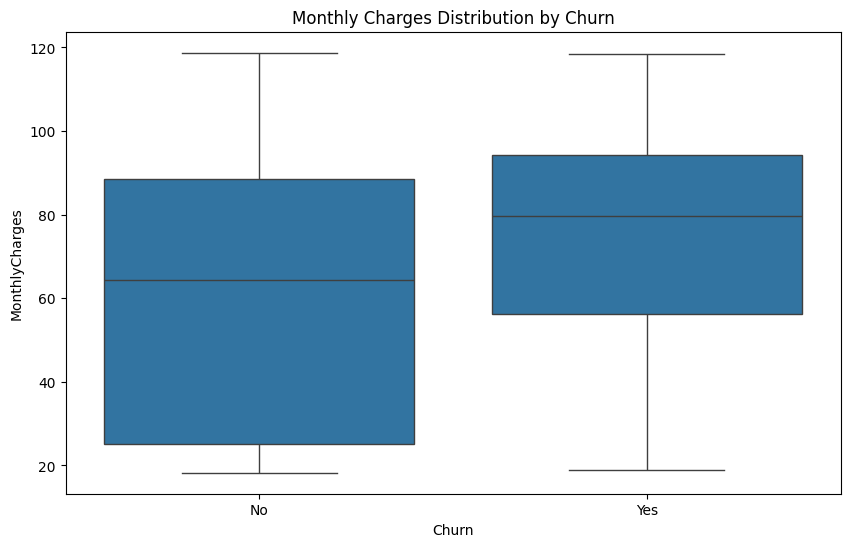

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution by Churn')
plt.show()

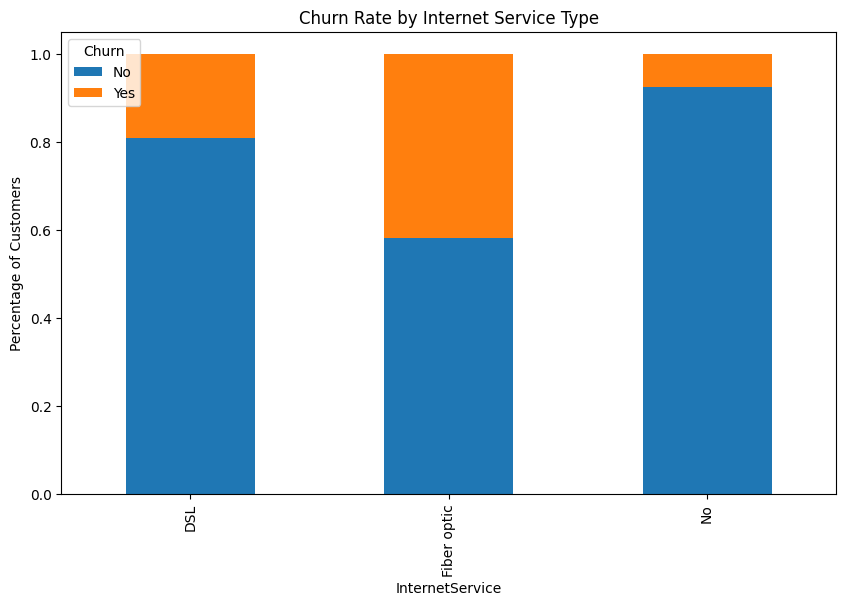

In [16]:
ct = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Percentage of Customers')
plt.title('Churn Rate by Internet Service Type')
plt.show()

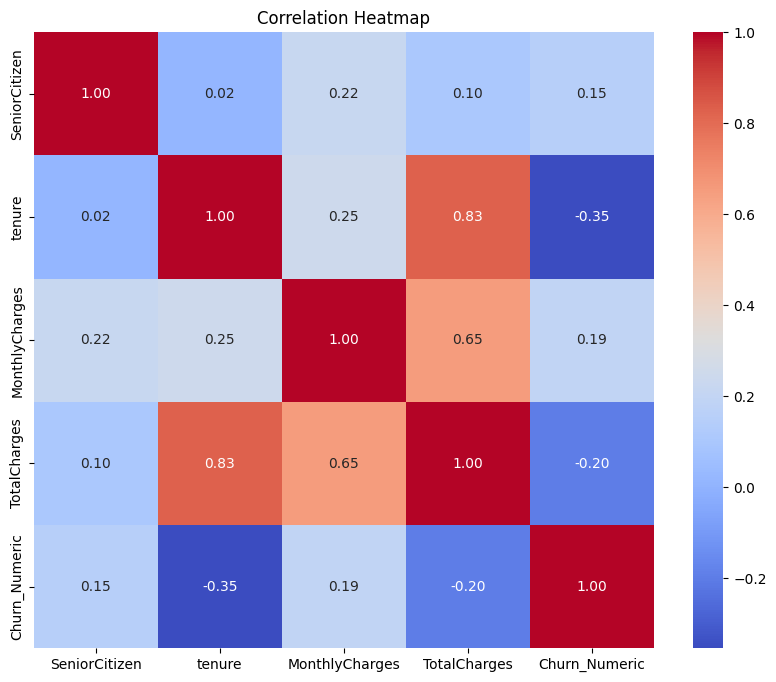

In [20]:
df['Churn_Numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
#to select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
#Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()